# Data Exploration

In [536]:
#Keep this section; ensures that before any cell is run, all modules are reloaded
%reload_ext autoreload
%autoreload 2

In [537]:
import pandas as pd
df=pd.read_csv('heart_attack_prediction_dataset.csv')
df.head().T

,0,1,2,3,4
Patient ID,BMW7812,CZE1114,BNI9906,JLN3497,GFO8847
Age,67,21,21,84,66
Sex,Male,Male,Female,Male,Male
Cholesterol,208,389,324,383,318
Blood Pressure,158/88,165/93,174/99,163/100,91/88
Heart Rate,72,98,72,73,93
Diabetes,0,1,1,1,1
Family History,0,1,0,1,1
Smoking,1,1,0,1,1
Obesity,0,1,0,0,1


In [538]:
#Third party librasy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Local imports
from helper_functionss import prediction_models

In [539]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [540]:
df.shape

(8763, 26)

## Checking Null values and duplicate values and outliers in the dataset 

In [541]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [542]:
df.duplicated().sum()

0

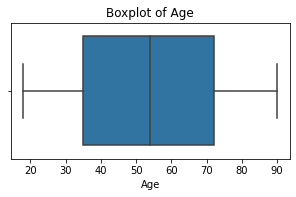

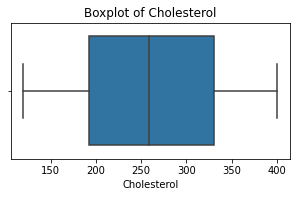

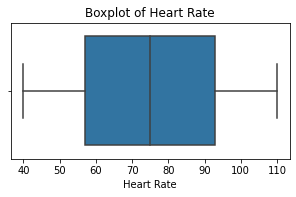

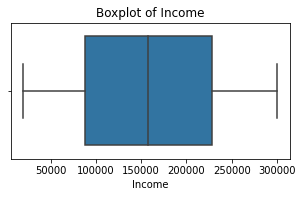

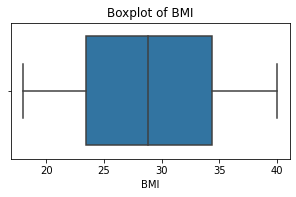

In [543]:
# call the boxplot outlier function from the helper_functionss.py file for Checking Outliers
from helper_functionss import boxplot_outliers
boxplot_outliers(df, ['Age','Cholesterol',
       'Heart Rate', 'Income', 'BMI'])

# Exploratory Data Analysis

In [544]:
# Creating percent of each Heart Attack Risk
classes = df['Heart Attack Risk'].value_counts().reset_index()
classes['percent'] =round(classes['Heart Attack Risk'] / classes['Heart Attack Risk'].sum() * 100)
classes

,index,Heart Attack Risk,percent
0,0,5624,64.0
1,1,3139,36.0


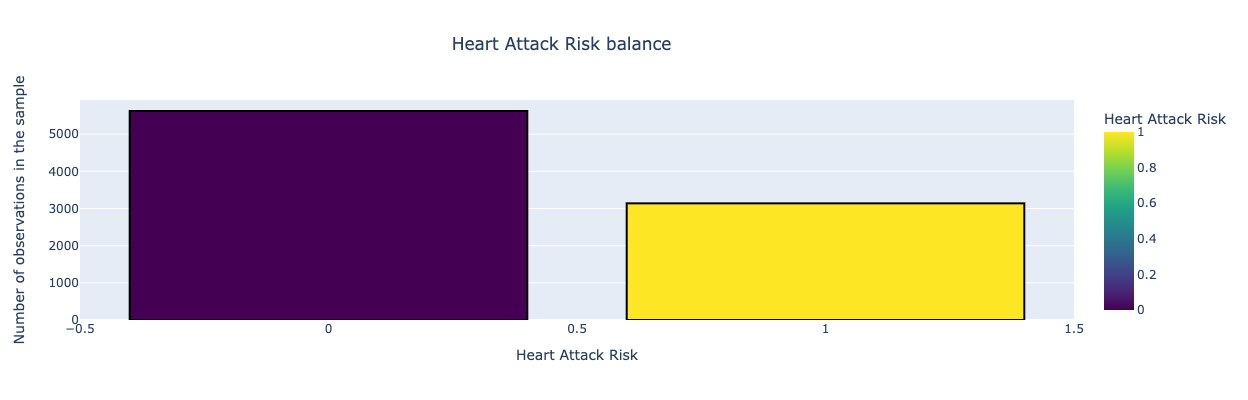

In [545]:
import plotly.express as px


fig = px.bar(classes,
             x='index',
             y='Heart Attack Risk',
             color='index',
             title='Heart Attack Risk balance',
             labels={'Heart Attack Risk' : 'Number of observations in the sample','index':'Heart Attack Risk'},
             color_continuous_scale = 'viridis',
             height=400,
             width=600             
            )

fig.update_traces(marker_line_color = 'black',
                  marker_line_width = 2)
fig.update_layout(title_x=0.45)
fig.show()

In [546]:
# Categorical Data
categorical_data = df[['Sex','Diet','Continent','Country','Hemisphere']]

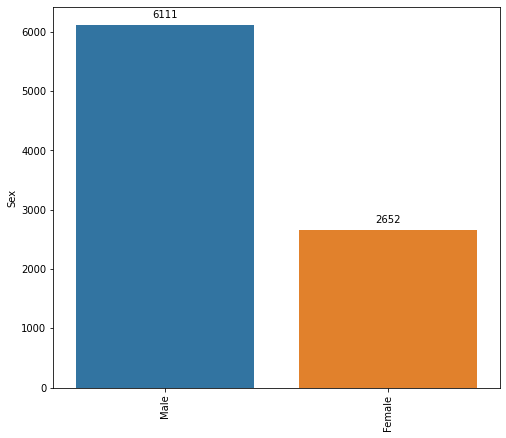

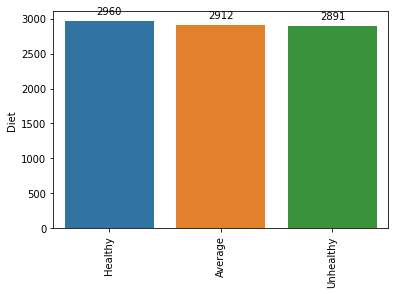

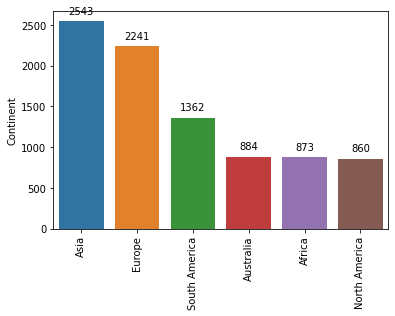

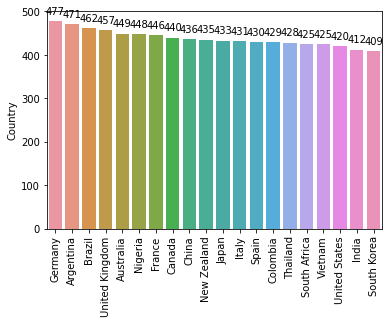

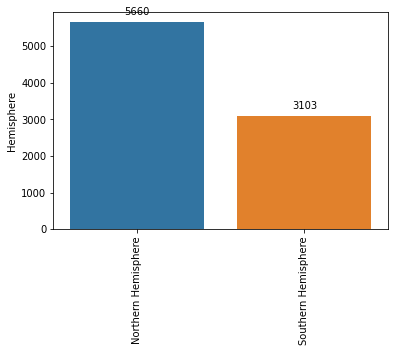

In [547]:
plt.figure(figsize=(8, 7))

# Graphs for categorical data
for col in categorical_data.columns:
    ctg_num = categorical_data[col].value_counts()
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)
    for patch in chart.patches:
        chart.annotate(format(patch.get_height(), '.0f'), 
                     (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize=10)
        
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show() 

In [548]:
#Finding the features which are most relevant to Heart Attack Risk

numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274


### Based on the corrolation matrix we can see 

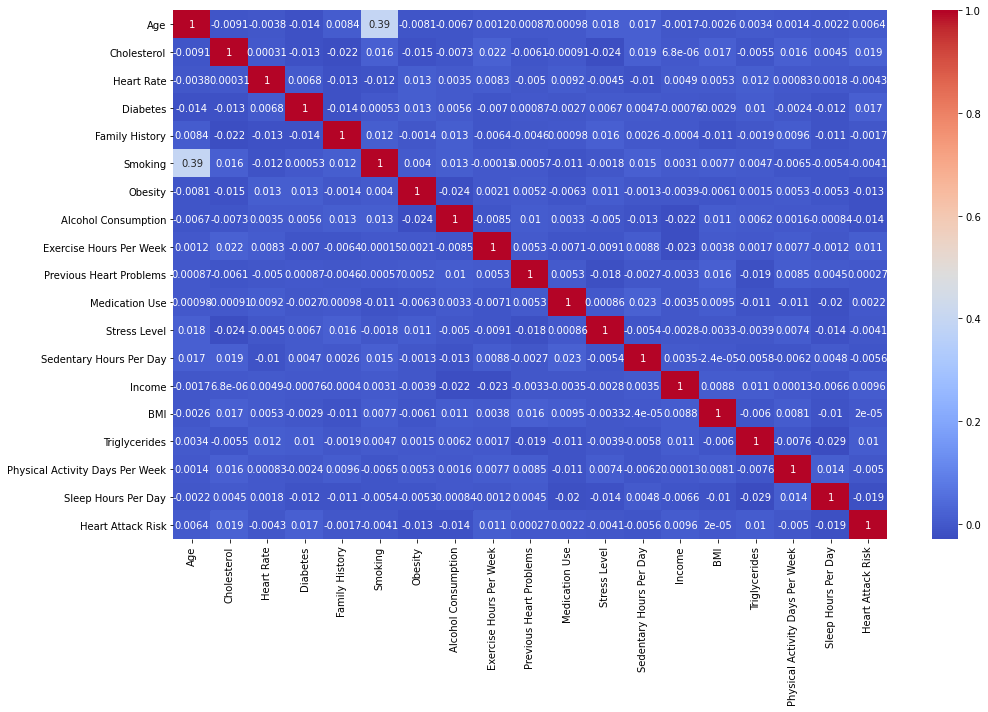

<Figure size 432x288 with 0 Axes>

In [549]:
# Creating heatmap for visualizing the correclations between features
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()
plt.savefig('heat')

### Separating the Blood Pressure into systolic and diastolic

In [550]:
df['systolic']=df['Blood Pressure'].apply(lambda x:x.split('/')[0])
df['systolic']=df['systolic'].astype(int)

df['diastolic']=df['Blood Pressure'].apply(lambda x:x.split('/')[1])
df['diastolic']=df['diastolic'].astype(int)

# Two new column added into dataframe
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic,diastolic
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [551]:
# Changing the type of columns with values of 0 and 1 to boolean type
boolean_cols=['Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems','Medication Use']

for col in boolean_cols:
    df[col] = df[col].astype('bool')
    
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic,diastolic
0,BMW7812,67,Male,208,158/88,72,False,False,True,False,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,165/93,98,True,True,True,True,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,174/99,72,True,False,False,False,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,163/100,73,True,True,True,False,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,91/88,93,True,True,True,True,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


### Analytics Base Tables

In [552]:
# Creating two different ABTs (Analytic Base Table), one for numerical columns and the other one for non numerical columns
ABT_numerical=df.describe().round(2)
numeric_cols = list(ABT_numerical.columns)
non_numerical_cols = list(set(df.columns) - set(numeric_cols)-set(['Blood Pressure','Patient ID']))

# Visualize the changes
print(numeric_cols)
display(ABT_numerical.T)

['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'systolic', 'diastolic']


,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.71,21.25,18.0,35.00,54.00,72.00,90.0
Cholesterol,8763.0,259.88,80.86,120.0,192.00,259.00,330.00,400.0
Heart Rate,8763.0,75.02,20.55,40.0,57.00,75.00,93.00,110.0
Exercise Hours Per Week,8763.0,10.01,5.78,0.0,4.98,10.07,15.05,20.0
Stress Level,8763.0,5.47,2.86,1.0,3.00,5.00,8.00,10.0
Sedentary Hours Per Day,8763.0,5.99,3.47,0.0,3.00,5.93,9.02,12.0
Income,8763.0,158263.18,80575.19,20062.0,88310.00,157866.00,227749.00,299954.0
BMI,8763.0,28.89,6.32,18.0,23.42,28.77,34.32,40.0
Triglycerides,8763.0,417.68,223.75,30.0,225.50,417.00,612.00,800.0
Physical Activity Days Per Week,8763.0,3.49,2.28,0.0,2.00,3.00,5.00,7.0


### Changing data type of 'Physical Activity Days Per Week' and 'Sleep Hours Per Day' from numerical to categorical
##### as you can see in the previous table both aformentioned columns can get specific value from 1 day to 7 days, so we can changing the type and classify them as categorical features

In [553]:
df['Physical Activity Days Per Week']=df['Physical Activity Days Per Week'].astype(object)
df['Sleep Hours Per Day']=df['Sleep Hours Per Day'].astype(object)

In [554]:
# run the same code for creating ABT for numerical features without 2 columns:'Physical Activity Days Per Week' and 'Physical Activity Days Per Week'
ABT_numerical=df.describe().round(2)
numeric_cols = list(ABT_numerical.columns)
non_numerical_cols = list(set(df.columns) - set(numeric_cols)-set(['Blood Pressure','Patient ID']))

# Visualize the changes
print(numeric_cols)
display(ABT_numerical)

['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Heart Attack Risk', 'systolic', 'diastolic']


,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Heart Attack Risk,systolic,diastolic
count,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00
mean,53.71,259.88,75.02,10.01,5.47,5.99,158263.18,28.89,417.68,0.36,135.08,85.16
std,21.25,80.86,20.55,5.78,2.86,3.47,80575.19,6.32,223.75,0.48,26.35,14.68
min,18.00,120.00,40.00,0.00,1.00,0.00,20062.00,18.00,30.00,0.00,90.00,60.00
25%,35.00,192.00,57.00,4.98,3.00,3.00,88310.00,23.42,225.50,0.00,112.00,72.00
50%,54.00,259.00,75.00,10.07,5.00,5.93,157866.00,28.77,417.00,0.00,135.00,85.00
75%,72.00,330.00,93.00,15.05,8.00,9.02,227749.00,34.32,612.00,1.00,158.00,98.00
max,90.00,400.00,110.00,20.00,10.00,12.00,299954.00,40.00,800.00,1.00,180.00,110.00


In [555]:
ABT_non_numerical= df[non_numerical_cols].describe().T

display(ABT_non_numerical)

,count,unique,top,freq
Diet,8763,3,Healthy,2960
Smoking,8763,2,True,7859
Previous Heart Problems,8763,2,False,4418
Diabetes,8763,2,True,5716
Physical Activity Days Per Week,8763,8,3,1143
Sex,8763,2,Male,6111
Country,8763,20,Germany,477
Continent,8763,6,Asia,2543
Obesity,8763,2,True,4394
Medication Use,8763,2,False,4396


### Classification of features of the dataset to three categories

In [556]:
# bool_cols refer to faetures with 2 values 0 and 1 (binary)
non_numerical_features= ABT_non_numerical.reset_index()
bool_cols = non_numerical_features[(non_numerical_features['unique']==2)&(non_numerical_features['index']!='Heart Attack Risk')&
(non_numerical_features['index']!='Sex')&(non_numerical_features['index']!='Hemisphere')]['index'].to_list()

# categorical columns 
cat_cols = non_numerical_features[(non_numerical_features['unique']>2)|(non_numerical_features['index']=='Sex')|
(non_numerical_features['index']=='Hemisphere')]['index'].to_list()

# non ordinal categorical columns
non_ordinal_cat_cols=list(set(cat_cols)-{'Sleep Hours Per Day','Physical Activity Days Per Week','Diet'})

# 'Sleep Hours Per Day','Physical Activity Days Per Week' they already have int values so we don't need to encode them just we should change their type
# 'obj' to 'int'
df['Physical Activity Days Per Week']=df['Physical Activity Days Per Week'].astype(int)
df['Sleep Hours Per Day']=df['Sleep Hours Per Day'].astype(int)

bool_cols, cat_cols , non_ordinal_cat_cols

(['Smoking',
  'Previous Heart Problems',
  'Diabetes',
  'Obesity',
  'Medication Use',
  'Alcohol Consumption',
  'Family History'],
 ['Diet',
  'Physical Activity Days Per Week',
  'Sex',
  'Country',
  'Continent',
  'Sleep Hours Per Day',
  'Hemisphere'],
 ['Sex', 'Country', 'Hemisphere', 'Continent'])

In [557]:
for col in bool_cols: 
    df[col]=df[col].astype(int)

In [558]:
# Diet is an ordinal feature so We used ordinal encoding for that, But the rest of categorical features which are not ordinal changeing to encode 
# by next function
ORDINAL_MAP = {'Healthy':2,'Average':1,'Unhealthy':0}
df['Diet'] = df['Diet'].map(ORDINAL_MAP)

In [559]:
# encoding non_ordinal_features that the order do not matter for them such as 'Sex', 'Country', 'Hemisphere', 'Continent'
def levels2index(levels):
    dct = {}
    for i in range(len(levels)):
        dct[levels[i]] = i
    return dct
        
for col in non_ordinal_cat_cols:
    level_substitution = levels2index(df[col].unique())
    df[col].replace(level_substitution, inplace=True)

In [560]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,systolic,diastolic
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,0,0,0,0,158,88
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,1,1,1,0,165,93
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,2,2,1,0,174,99
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,1,1,1,0,163,100
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,3,3,1,0,91,88


In [561]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'systolic',
       'diastolic'],
      dtype='object')

In [562]:
# Our feature variables for modelling 
X = df[['Age', 'Sex', 'Cholesterol','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','systolic',
       'diastolic']]

# Our Target variabls for modelling      
y=df['Heart Attack Risk'].values

In [563]:
X.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
systolic                             int64
diastolic                            int64
dtype: object

In [564]:
print(y[0:10])

[0 0 0 0 0 1 1 1 0 0]


# Divide data into training and validation sample

In [565]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (6134, 22)
X_test: (2629, 22)
y_train: (6134,)
y_test: (2629,)


### Data Scaling

In [566]:
# making dataset values comparable to each other
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [567]:
#from helper_functionss import prediction_models
prediction_models(X_train_scal, y_train, X_test_scal, y_test)

LogisticRegression()
Accuracy of Logistic_Regression:  0.6416888550779765
Precision of Logistic_Regression:  1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

Confusion Matrix:
[[1687    0]
 [ 942    0]]
RandomForestClassifier()


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Accuracy of Random_Forest:  0.6397869912514264
Precision of Random_Forest:  0.4647887323943662
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1687
           1       0.46      0.04      0.07       942

    accuracy                           0.64      2629
   macro avg       0.55      0.51      0.42      2629
weighted avg       0.58      0.64      0.52      2629

Confusion Matrix:
[[1649   38]
 [ 909   33]]
DecisionTreeClassifier(random_state=42)
Accuracy of Decision_Tree:  0.5207303157093952
Precision of Decision_Tree:  0.33709016393442626
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1687
           1       0.34      0.35      0.34       942

    accuracy                           0.52      2629
   macro avg       0.48      0.48      0.48      2629
weighted avg       0.52      0.52      0.52      2629

Confusion Matrix:
[[1040

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


### WE choose Random Forest Model Because of the higher recall Ratio which is so important about this dataset. So we do feature selection to check if we can get better result or not.

In [568]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
clf =RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

<Figure size 1080x576 with 0 Axes>

### Features selection with 2 methods: SHAP & Correlation by Pirson
#### We want to see by applying feature selection can we get better accuracy from our model

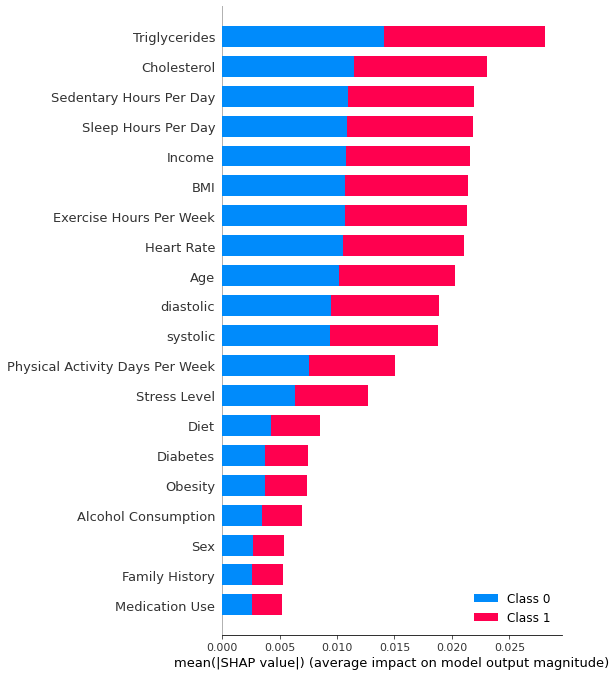

In [569]:
# We use Shap library wirh TreeExplainer to select best feature for decision tree classifier 
import shap

shap_values = shap.TreeExplainer(clf).shap_values(X_test, )
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names = ['Age', 'Sex', 'Cholesterol','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','systolic',
       'diastolic'])

In [570]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

# Correlation by Pirson is another way for feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)
 
features_corr = selector.get_feature_names_out()
print(features_corr)

['Cholesterol' 'Heart Rate' 'Diabetes' 'Obesity' 'Alcohol Consumption'
 'Sedentary Hours Per Day' 'Income' 'Triglycerides' 'Sleep Hours Per Day'
 'diastolic']


In [571]:
X_feasure_selected=df[['Cholesterol','Heart Rate','Exercise Hours Per Week',
 'Sedentary Hours Per Day', 'Income' ,'Triglycerides' ,'Sleep Hours Per Day','BMI', 'Age',
 'diastolic']]

### Running models for selected features

In [572]:
from sklearn.model_selection import train_test_split

selected_feature_X_train, selected_feature_X_test, selected_feature_y_train, selected_feature_y_test = train_test_split(X_feasure_selected, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
print(f'X_train: {selected_feature_X_train.shape}')
print(f'X_test: {selected_feature_X_test.shape}')
print(f'y_train: {selected_feature_y_train.shape}')
print(f'y_test: {selected_feature_y_test.shape}')

X_train: (6134, 10)
X_test: (2629, 10)
y_train: (6134,)
y_test: (2629,)


In [573]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(selected_feature_X_train)
X2_train_scal = scaler.transform(selected_feature_X_train)
X2_test_scal = scaler.transform(selected_feature_X_test)

In [574]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X2_train_scal, selected_feature_y_train)

RandomForestClassifier(random_state=42)

In [575]:
# we can not see any improvement after feature selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = rf_model.predict(X2_test_scal)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6211487257512363
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76      1687
           1       0.31      0.05      0.08       942

    accuracy                           0.62      2629
   macro avg       0.47      0.49      0.42      2629
weighted avg       0.52      0.62      0.52      2629

Confusion Matrix:
 [[1590   97]
 [ 899   43]]


# Hyperparameter Tuning of Random Forest Model


In [579]:
Hyper = [{'n_estimators':[100,200,400], 'max_depth':[None, 5,10,15],
        'min_samples_split':[3,5,9] , 'min_samples_leaf':[1,2,3]}]

#Set parameters
search = GridSearchCV(estimator = rfc, param_grid = Hyper, scoring = 'accuracy', cv=8,
                    n_jobs = -1,verbose = 2)
search = search.fit(X2_train_scal, selected_feature_y_train)
search.best_score_

Fitting 8 folds for each of 108 candidates, totalling 864 fits


0.641832561163667

In [580]:
search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [581]:
rfc = RandomForestClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 5,
 n_estimators= 500)
rfc.fit(X2_train_scal, selected_feature_y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=500)

In [582]:
rfc_pred = rfc.predict(X2_test_scal)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6211487257512363


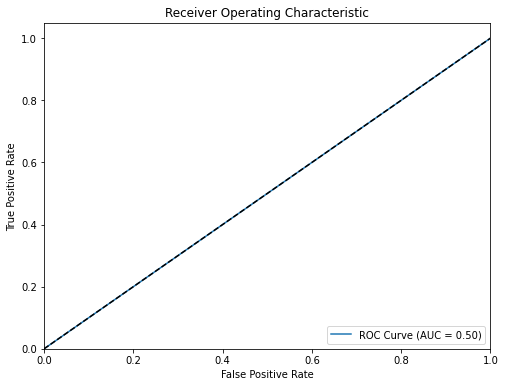

In [583]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
auc = roc_auc_score(y_test, rfc_pred)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()